<center>
<img src="https://github.com/spiralhead/mlcourse.ai/blob/master/img/ods_stickers.jpg?raw=1" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitsky](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Topic 2. Visual data analysis
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here"). No need to select answers in a webform.**

**<a href="https://www.kaggle.com/c/titanic">Competition</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt

In [3]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

print(f'You are running code { {True:"in",False:"not in"}[IN_COLAB] } colab!!!')

if IN_COLAB:
  !wget -O titanic_train.csv https://github.com/spiralhead/mlcourse.ai/blob/data/titanic_train.csv
 

You are running code in colab!!!
--2021-11-13 19:02:03--  https://github.com/spiralhead/mlcourse.ai/blob/data/titanic_train.csv
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-11-13 19:02:03 ERROR 404: Not Found.



**Read data**

In [4]:

if IN_COLAB:
  train_df = pd.read_csv("https://raw.githubusercontent.com/spiralhead/mlcourse.ai/master/data/titanic_train.csv", index_col="PassengerId")
else:
  train_df = pd.read_csv("../../data/titanic_train.csv", index_col="PassengerId")

In [5]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
train_df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Stone, Mrs. George Nelson (Martha Evelyn)",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Let's drop`Cabin`, and then – all rows with missing values.**

In [8]:
train_df = train_df.drop("Cabin", axis=1).dropna()

In [9]:
train_df.shape

(712, 10)

**1. Build a picture to visualize all scatter plots for each pair of features `Age`, `Fare`, `SibSp`, `Parch` and `Survived`. ( `scatter_matrix ` from Pandas or `pairplot` from Seaborn)**

**Graph by pandas**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3df3aca0d0>,
      dtype=object)

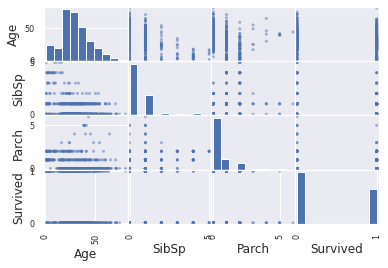

In [10]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
features = ['Age','SibSp', 'Parch','Survived']
printmd('**Graph by pandas**')
pd.plotting.scatter_matrix(train_df[features])

**Graph by seaborn**

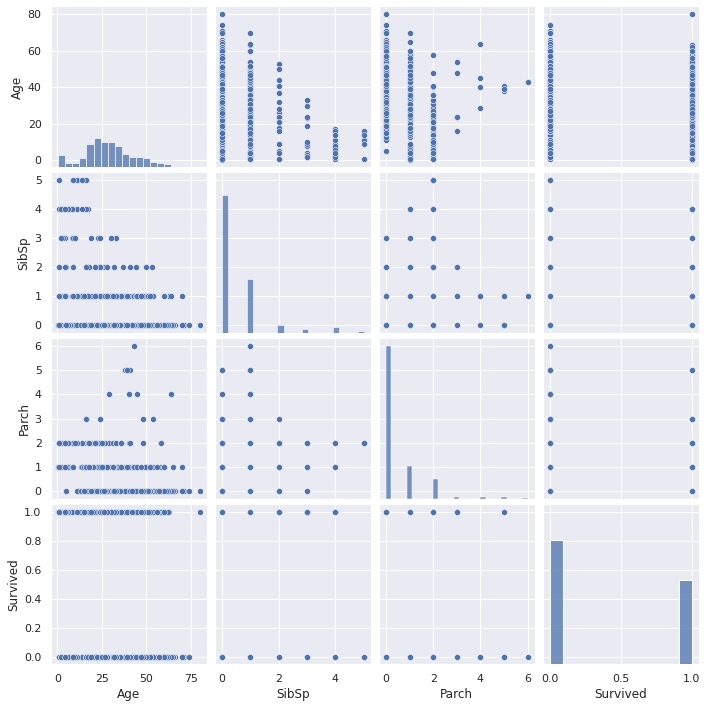

In [11]:
printmd('**Graph by seaborn**')
sns.pairplot(train_df[features])

**2. How does ticket price (`Fare`) depend on `Pclass`? Build a boxplot.**

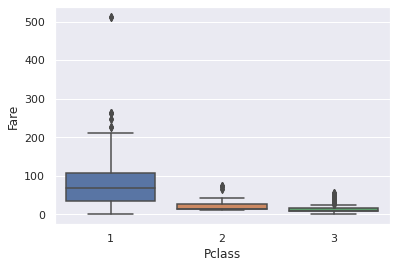

In [18]:
sns.boxplot(x='Pclass', y = 'Fare',data = train_df)

**3. Let's build the same plot but restricting values of `Fare` to be less than 95% quantile of the initial vector (to drop outliers that make the plot less clear).**

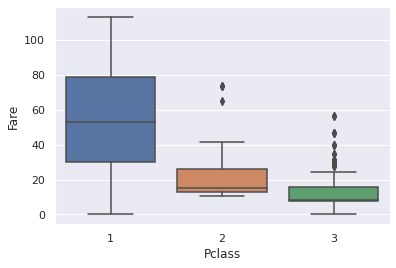

In [24]:
quant_95 = train_df['Fare'].quantile(0.95)
sns.boxplot(x='Pclass', y = 'Fare',data = train_df[train_df['Fare']<quant_95])

**4. How is the percentage of surviving passengers dependent on passengers' gender? Depict it with `Seaborn.countplot` using the `hue` argument.**

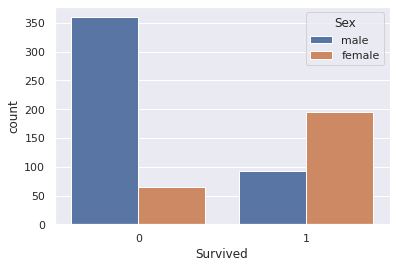

In [26]:
sns.countplot(x='Survived',hue='Sex',data=train_df)

**5. How does the distribution of ticket prices differ for those who survived and those who didn't. Depict it with `Seaborn.boxplot`**

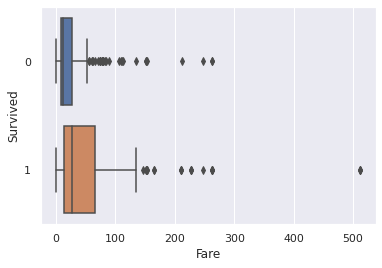

In [30]:
sns.boxplot(x='Fare',y='Survived',data=train_df,orient='h')
# You code here

**6. How does survival depend on passengers' age?  Verify (graphically) an assumption that youngsters (< 30 y.o.) survived more frequently than old people (> 55 y.o.).**

**Assumption approved!**

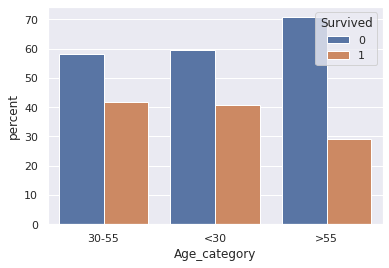

In [49]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return '<30'
    elif age < 55:
        return '30-55'
    elif age >= 55:
        return '>55'

age_categories = [age_category(age) for age in train_df.Age]
train_df["Age_category"] = age_categories
new_data = train_df.groupby('Age_category')['Survived'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
new_data
sns.barplot(x="Age_category", hue="Survived", y='percent', data=new_data)
printmd('**Assumption approved!**')

## Useful resources
* The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-practice-visualization) with a [solution](https://www.kaggle.com/kashnitsky/topic-2-practice-solution)
* Topic 2 "Visual data analysis in Python" as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
* Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)